# Customer Churn Analysis
### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

**Note: You can find the dataset in the link below.**

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

### Importing Necessery liabraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
# Importing Dataset
df = pd.read_csv(r"D:\data scienctist\projects\Evolution Projects\Evolution projects data\Telecom_customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


So here we can see The dataset contains the details of Applicants who have applied for loan. 
* This dataset is comprised of 7043 rows and 21 columns including one target varibale i.e. 'Churn'.
* There are two unique values in the target column Yes and No.
* The target variable that is 'Churn' has two classes, hence this is a classification data problem. We will look more into the dataset in the EDA part

##  Exploratory Data Analysis(EDA) & Feature Engineering:

In [4]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


So here we can see the dataset contains different features with different data types.

* There are two types of data namely object type(18 columns) and int64/float64 data type(3 columns).
* In column total charges there is numeric data is present but its showing object data type, we need to convert it into float.
* We will take care of the object datatype using encoding techniques later.

In [5]:
#lets convert TotalCharges to numeric data

df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [6]:
#Lets chcek the datatypes again
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

* Now we have converted TotalCharges column to float type.

In [7]:
# checking the null values in the dataframe
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* here we can see column 'TotalCharges' have some null values.

In [8]:
#Lets replace null values from column TotalCharges with the mean value of that column
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [9]:
#Lets again chcek null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

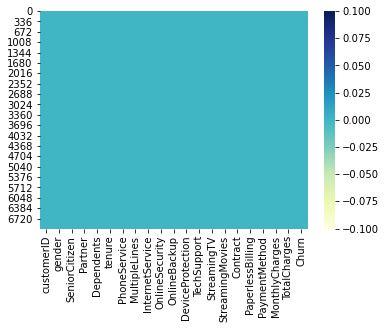

In [10]:
# Visul representation of no null
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.show()

* We can see, we have sucessfully removed the Null values from our dataset.

In [11]:
# Checking duplicated values

df.duplicated().sum()

0

* we don't have the duplicate values as well.

In [12]:
#Checking the number of unique values in each columns:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


* From the above cell we can check the no. of unique values present in each columns.
* As the column customerID is not required for model building we will drop this column. 

In [13]:
df.drop(columns = 'customerID', inplace = True)

In [14]:
#Checking the value counts of each of the columns

for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
---------------------------------
""")

 Column 'gender' :
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------

 Column 'SeniorCitizen' :
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------------------

 Column 'Partner' :
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------

 Column 'Dependents' :
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------

 Column 'tenure' :
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---------------------------------

 Column 'PhoneService' :
Yes    6361
No      682
Name: PhoneService, dtype: int64
---------------------------------

 Column 'MultipleLines' :
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---------------------------------

 Column 'InternetService' :
Fiber optic    3096
DSL            2

In [15]:
# Replacing invalid values with valid 
df = df.replace('No internet service', 'No')

In [16]:
df['PhoneService'] = df['PhoneService'].replace('No phone service','No')
df['MultipleLines'] = df['PhoneService'].replace('No phone service','No')

In [17]:
# ReChecking the value counts of each of the columns

for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
---------------------------------
""")

 Column 'gender' :
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------

 Column 'SeniorCitizen' :
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------------------

 Column 'Partner' :
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------

 Column 'Dependents' :
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------

 Column 'tenure' :
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---------------------------------

 Column 'PhoneService' :
Yes    6361
No      682
Name: PhoneService, dtype: int64
---------------------------------

 Column 'MultipleLines' :
Yes    6361
No      682
Name: MultipleLines, dtype: int64
---------------------------------

 Column 'InternetService' :
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtyp

### Statistical Analysis of the DataSet:

In [18]:
df.describe().T #numerical columns only

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


* This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Data Visualization:

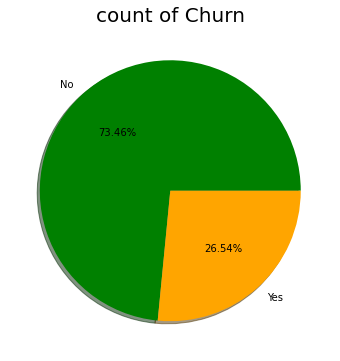

In [20]:
# Visualize the count of Churn of the customer
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors = ["green","orange"]
ax.pie(df['Churn'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title('count of Churn',fontsize=20)
plt.show()

* This shows dataset is imbalanced, we can see there are more number of customers who have not churned, compared to churned numbers.

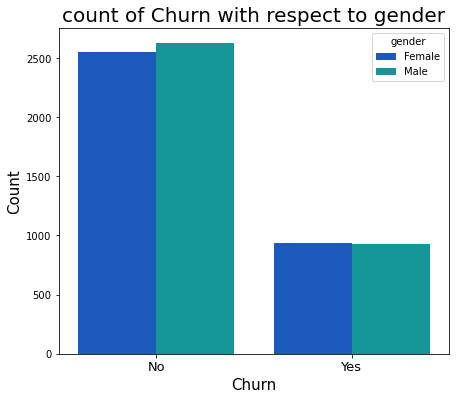

In [21]:
plt.figure(figsize=(7,6))
sns.countplot( x = 'Churn',hue = 'gender',data = df,palette = 'winter')

plt.title('count of Churn with respect to gender',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* We can see we can see churn is irrelevant of the gender, male and female have almost same percentage of churn.

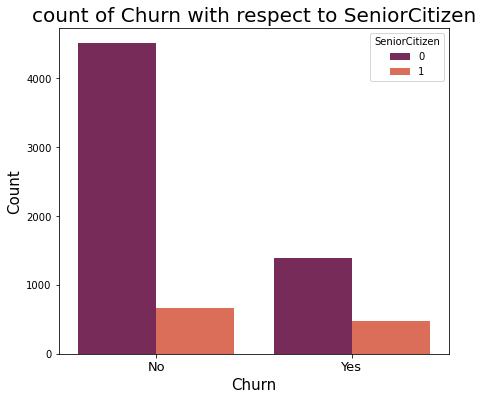

In [22]:
plt.figure(figsize=(7,6))
sns.countplot( x = 'Churn',hue = 'SeniorCitizen',data = df,palette = 'rocket')

plt.title('count of Churn with respect to SeniorCitizen',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* Above graph shows that Senior Citizen are less likely to leave the service.

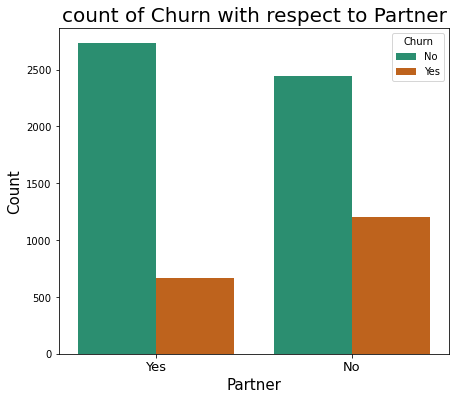

In [23]:
plt.figure(figsize=(7,6))
sns.countplot( x = 'Partner',hue = 'Churn',data = df,palette = 'Dark2')

plt.title('count of Churn with respect to Partner',fontsize=20)
plt.xlabel('Partner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* This plot will tell us that customer without partner has more churn rate compared to that of who is with partner.

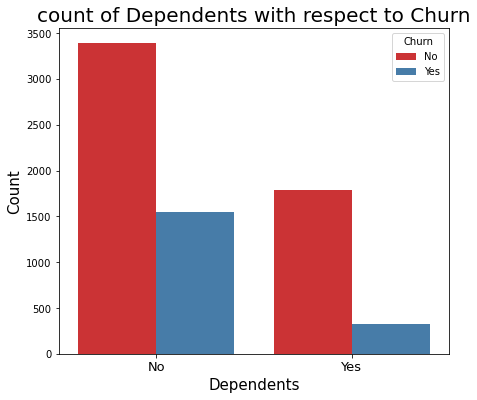

In [24]:
#check the relation between Partner and Churn

plt.figure(figsize=(7,6))
sns.countplot( x = 'Dependents',hue = 'Churn',data = df,palette = 'Set1')

plt.title('count of Dependents with respect to Churn',fontsize=20)
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* here we can say that the churn rate is more in case of customers who are having dependents.

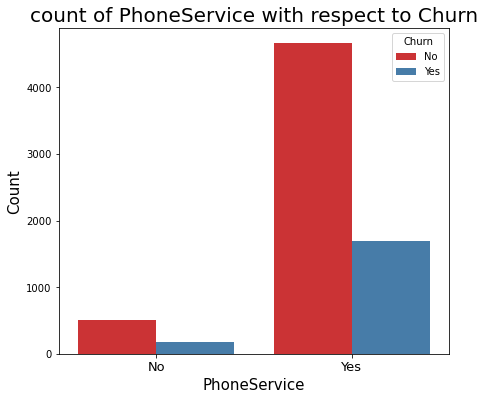

In [25]:
#check the relation between PhoneService and Churn
plt.figure(figsize=(7,6))
sns.countplot( x = 'PhoneService',hue = 'Churn',data = df,palette = 'Set1')

plt.title('count of PhoneService with respect to Churn',fontsize=20)
plt.xlabel('PhoneService',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* We can say there are more number of customers using phone service, and also more number of people churned from this category.

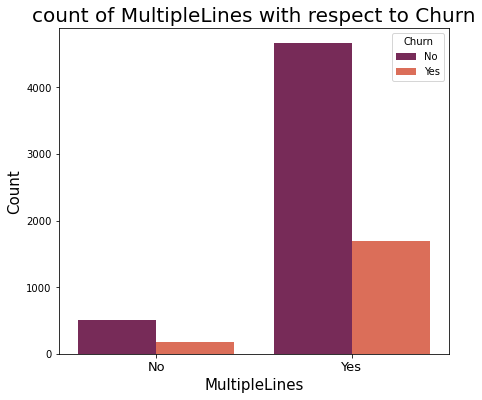

In [26]:
#check the relation between PhoneService and Churn
plt.figure(figsize=(7,6))
sns.countplot( x = 'MultipleLines',hue = 'Churn',data = df,palette = 'rocket')

plt.title('count of MultipleLines with respect to Churn',fontsize=20)
plt.xlabel('MultipleLines',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* We can say there are very less number of customers with no phone service.

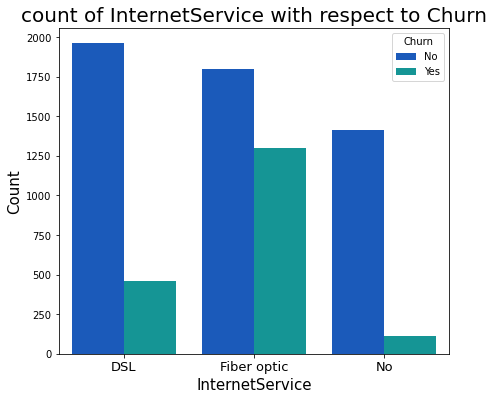

In [27]:
#check the relation between InternetService and Churn
plt.figure(figsize=(7,6))
sns.countplot( x = 'InternetService',hue = 'Churn',data = df,palette = 'winter')

plt.title('count of InternetService with respect to Churn',fontsize=20)
plt.xlabel('InternetService',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* By seeing above plot we can say that the churn ratio is higher in case of fiber optic compared to others.

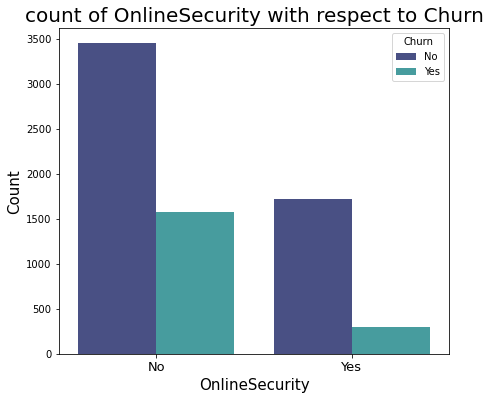

In [28]:
#check churn based on online security
plt.figure(figsize=(7,6))
sns.countplot( x = 'OnlineSecurity',hue = 'Churn',data = df,palette = 'mako')

plt.title('count of OnlineSecurity with respect to Churn',fontsize=20)
plt.xlabel('OnlineSecurity',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* This plot will tell us if there is no any online security, the ratio of churn is higher.

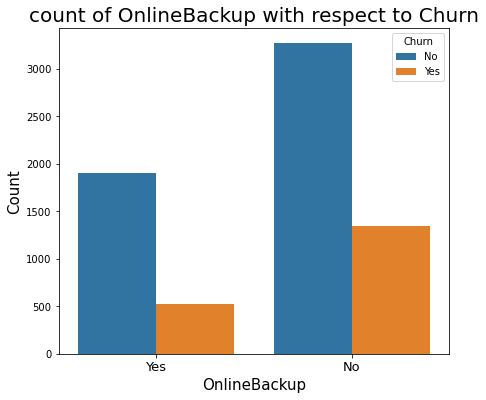

In [29]:
#check churn based on OnlineBackup
plt.figure(figsize=(7,6))
sns.countplot( x = 'OnlineBackup',hue = 'Churn',data = df)

plt.title('count of OnlineBackup with respect to Churn',fontsize=20)
plt.xlabel('OnlineBackup',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* Customer churn ratio is higher in case of unavailability of online backup.

In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

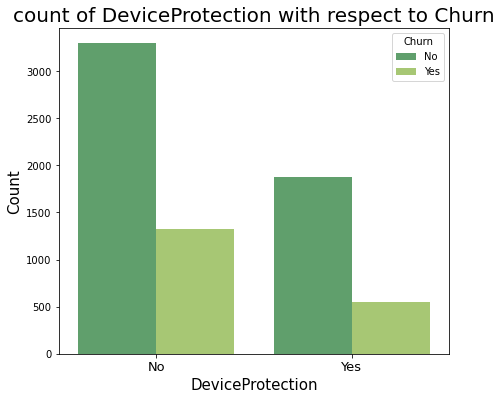

In [31]:
#check churn based on DeviceProtection
plt.figure(figsize=(7,6))
sns.countplot( x = 'DeviceProtection',hue = 'Churn',data = df,palette = 'summer')

plt.title('count of DeviceProtection with respect to Churn',fontsize=20)
plt.xlabel('DeviceProtection',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* Customer churn ratio is more in case if there is no any device protection available.

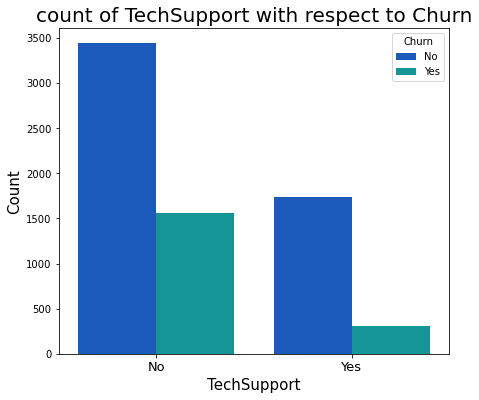

In [32]:
# check churn based on TechSupport
plt.figure(figsize=(7,6))
sns.countplot( x = 'TechSupport',hue = 'Churn',data = df,palette = 'winter')

plt.title('count of TechSupport with respect to Churn',fontsize=20)
plt.xlabel('TechSupport',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* This will tell us that if tech support is not available then the churn rate is high.

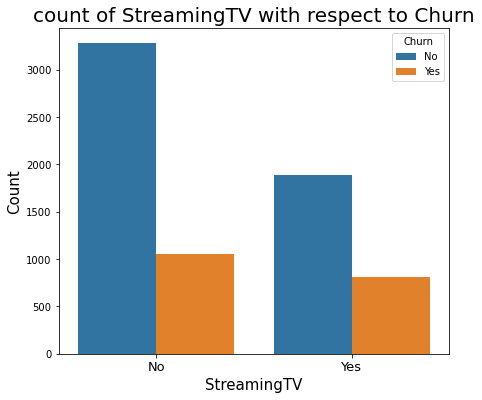

In [33]:
# check churn based on StreamingTV
plt.figure(figsize=(7,6))
sns.countplot( x = 'StreamingTV',hue = 'Churn',data = df)

plt.title('count of StreamingTV with respect to Churn',fontsize=20)
plt.xlabel('StreamingTV',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* chances of getting churn is nearly same if there is streamingTV available or not available.

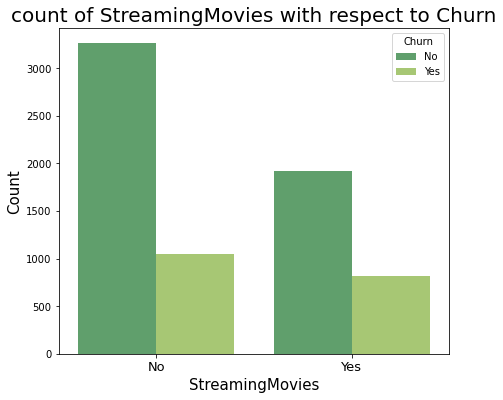

In [34]:
# check churn based on StreamingMovies
plt.figure(figsize=(7,6))
sns.countplot( x = 'StreamingMovies',hue = 'Churn',data = df,palette = 'summer')

plt.title('count of StreamingMovies with respect to Churn',fontsize=20)
plt.xlabel('StreamingMovies',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* This plot almost looking same as previous plot, in case if there is no internet service then ratio of getting churn is low.

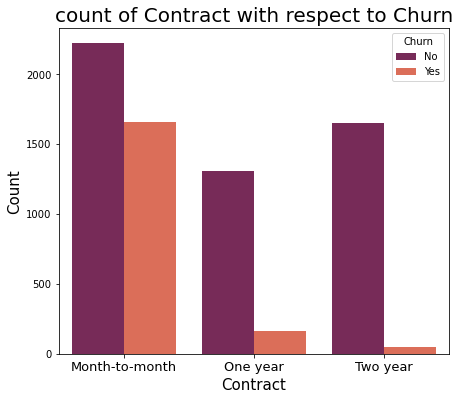

In [35]:
# check churn based on Contract
plt.figure(figsize=(7,6))
sns.countplot( x = 'Contract',hue = 'Churn',data = df,palette = 'rocket')

plt.title('count of Contract with respect to Churn',fontsize=20)
plt.xlabel('Contract',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* This will tell us that ratio of getting churned is high in case of month-to-month contract.

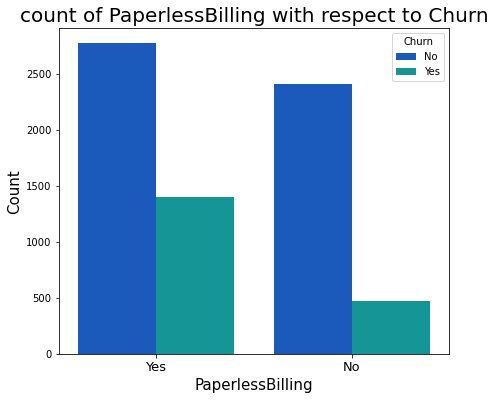

In [36]:
# check churn based on PaperlessBilling
plt.figure(figsize=(7,6))
sns.countplot( x = 'PaperlessBilling',hue = 'Churn',data = df,palette = 'winter')

plt.title('count of PaperlessBilling with respect to Churn',fontsize=20)
plt.xlabel('PaperlessBilling',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* We can see here if billing is paperless the ratio of getting churned becomes higher.

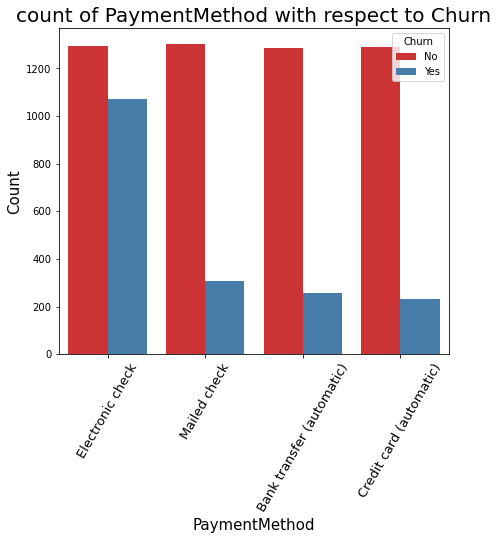

In [37]:
# check churn based on PaymentMethod
plt.figure(figsize=(7,6))
sns.countplot( x = 'PaymentMethod',hue = 'Churn',data = df,palette = 'Set1')

plt.title('count of PaymentMethod with respect to Churn',fontsize=20)
plt.xlabel('PaymentMethod',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=60)

plt.show()

* looking at this plot we can say that if payment is through electronic check then ratio of churn is higher compared to other methods.

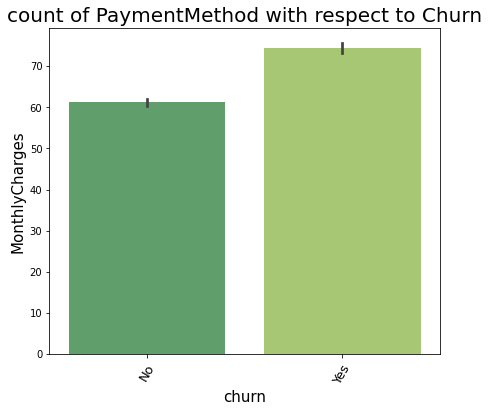

In [38]:
# barplot for MonthlyCharges vs churn
plt.figure(figsize=(7,6))
sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = df, palette='summer')

plt.title('count of PaymentMethod with respect to Churn',fontsize=20)
plt.xlabel('churn',fontsize=15)
plt.ylabel('MonthlyCharges',fontsize=15)
plt.xticks(fontsize=13 ,rotation=60)

plt.show()

* We can see that if monthly charges for customers goes above 60, the chances of getting churn is high.

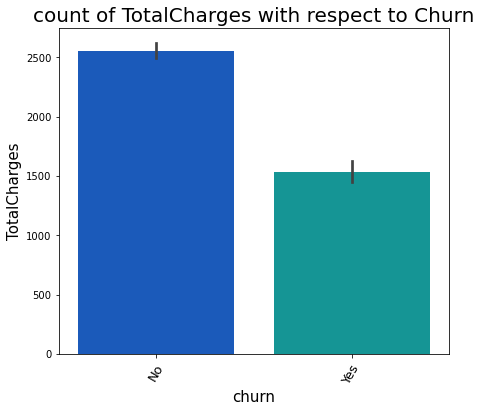

In [39]:
# barplot for TotalCharges vs churn
plt.figure(figsize=(7,6))
sns.barplot(x = 'Churn', y = 'TotalCharges', data = df, palette = 'winter')

plt.title('count of TotalCharges with respect to Churn',fontsize=20)
plt.xlabel('churn',fontsize=15)
plt.ylabel('TotalCharges',fontsize=15)
plt.xticks(fontsize=13 ,rotation=60)

plt.show()

* In Total charges we can see its opposite of monthly charges, here if total charges goes above 1500, the tendency of getting churned is low.

<Figure size 504x432 with 0 Axes>

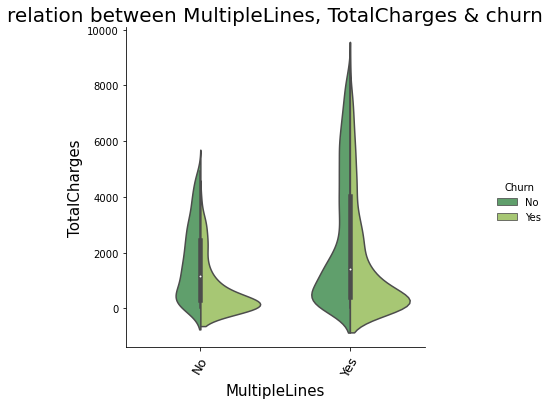

In [40]:
# lets check the relation between MultipleLines, TotalCharges, churn.

plt.figure(figsize=(7,6))
sns.catplot( x = 'MultipleLines', y="TotalCharges", hue = 'Churn', data = df, kind="violin", split=True, palette = 'summer')

plt.title('relation between MultipleLines, TotalCharges & churn',fontsize=20)
plt.xlabel('MultipleLines',fontsize=15)
plt.ylabel('TotalCharges',fontsize=15)
plt.xticks(fontsize=13 ,rotation=60)

plt.show()

* we can see, ratio of getting churn is higher when customers using multilines and where the total charges in the range of 0 to 8000.

<Figure size 504x432 with 0 Axes>

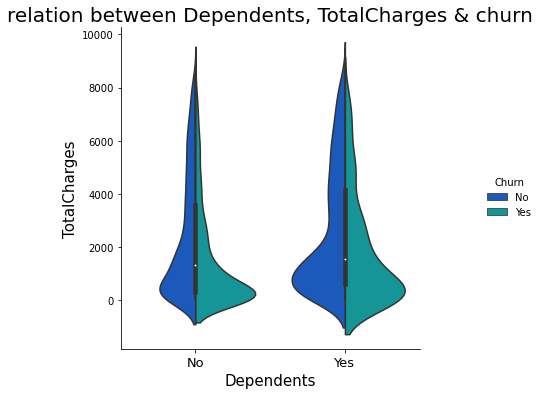

In [41]:
# lets check the relation between Dependents, TotalCharges, churn using Violin plot
plt.figure(figsize=(7,6))
sns.catplot( x = 'Dependents', y="TotalCharges", hue = 'Churn', data = df, kind="violin", split=True, palette = 'winter')

plt.title('relation between Dependents, TotalCharges & churn',fontsize=20)
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('TotalCharges',fontsize=15)
plt.xticks(fontsize=13)

plt.show()

* Looking at the above violin plot we can say if there are dependents and the total charges are in range 0 to 2000, the chances of getting churned are high.

<Figure size 504x432 with 0 Axes>

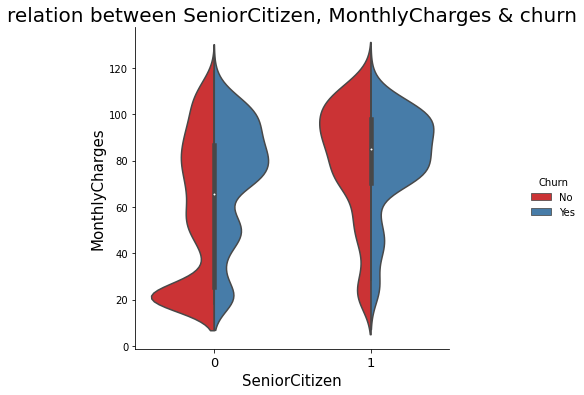

In [42]:
# lets check the relation between SeniorCitizen, MonthlyCharges, churn using Violin plot
plt.figure(figsize=(7,6))
sns.catplot( x = 'SeniorCitizen', y="MonthlyCharges", hue = 'Churn', data = df, kind="violin", split=True, palette = 'Set1')

plt.title('relation between SeniorCitizen, MonthlyCharges & churn',fontsize=20)
plt.xlabel('SeniorCitizen',fontsize=15)
plt.ylabel('MonthlyCharges',fontsize=15)
plt.xticks(fontsize=13)

plt.show()

* looking at above plot we can say if a customer is a senior citizen and montholy charges is between 70 to 110, the churn rate is high.
* when customer is not a senior citizen and having monthly charges arroung 20 then the ratio of churn is high.

* The data looks good, looking at the data description it ensures once again that there are no null values present.

### Checking for outliers using box plots:

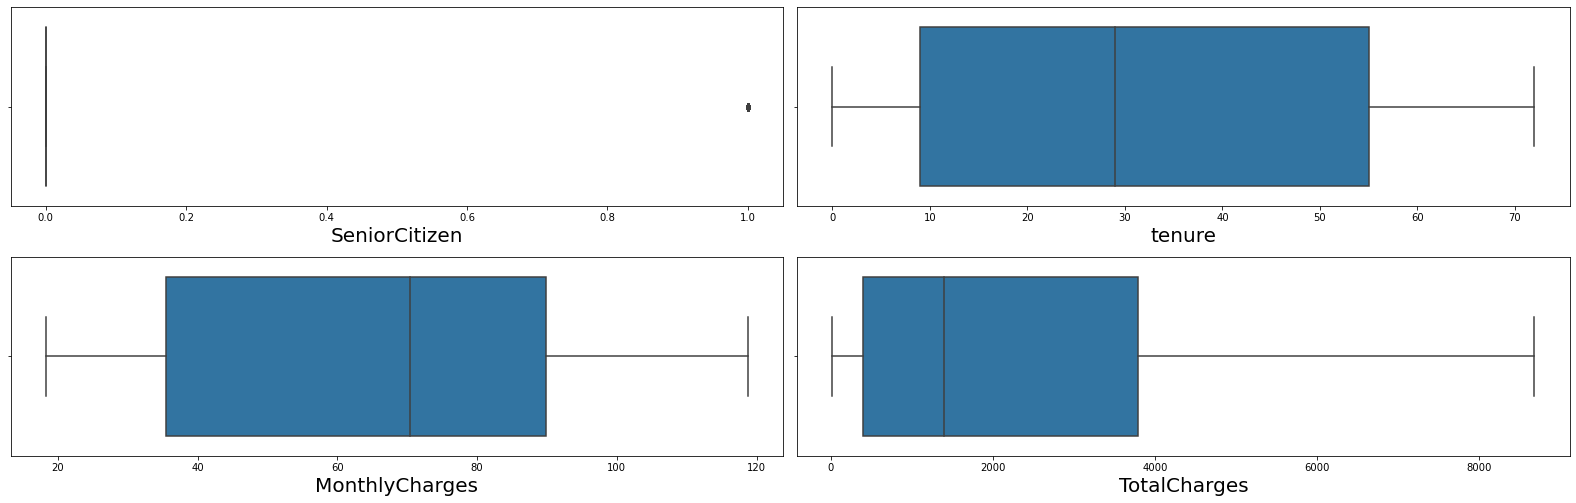

In [43]:
#lets check outliers from continuous columns

num_data = df._get_numeric_data()
plt.figure(figsize = (22,10),facecolor='white')

plotnumber = 1

for column in num_data:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
    
plt.tight_layout()

* By looking at the boxplots we can conclude that there are no any outliers present in our dataset. So we are not going to remove outliers.

### Encoding the categorical columns using Label Encoding:

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
# Encoding cateforical columns into binary columns
df.replace({'Yes':1, 'No':0}, inplace = True)
df['gender'].replace({'Male':1, 'Female':0}, inplace = True)

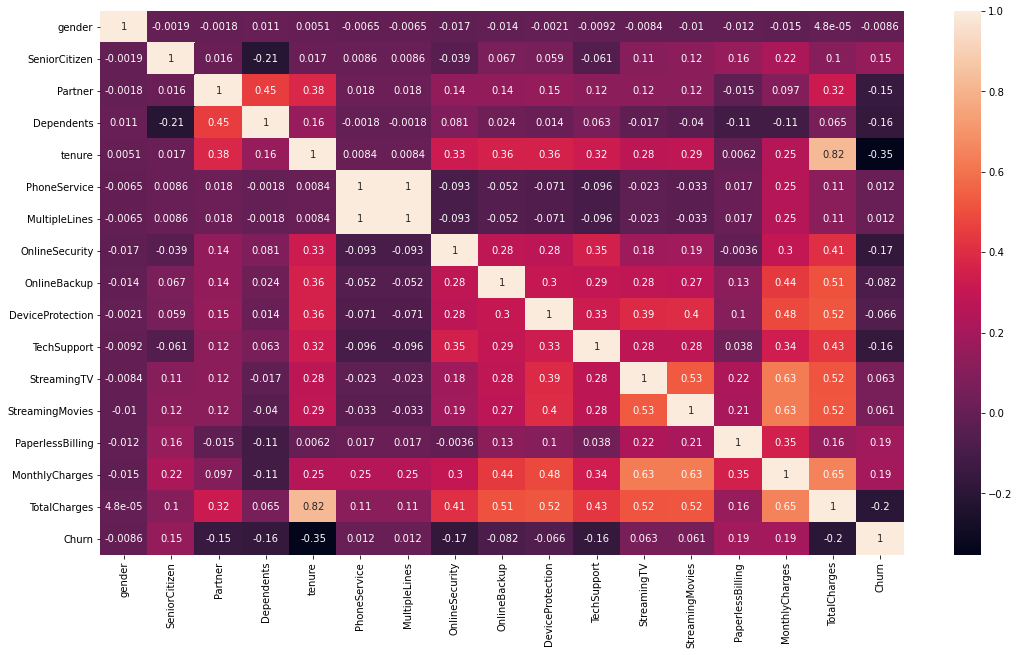

In [46]:
# Plotting Heatmap for correlation
plt.figure(figsize =(18,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Heatmap Analysiis -

* Our target Variable is negatively related to Online security , online backup, Tech support, device protection, tenure, gender, partner, dependents
* Mutiple lines and Phones services are 100 % correlated we can drop one of them

In [47]:
# Dropping highcorrelated column
df.drop('MultipleLines', axis ='columns', inplace = True)

In [48]:
df.shape

(7043, 19)

In [49]:
# encoding categorical columns with one hot encoder

def onehot_encoder(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis = 1)
        df.drop(column, axis = 1 , inplace = True)
        
    return df

In [50]:
# Encoding Catregrical columsn(Wind-direction)
cat_feat = ['InternetService','Contract','PaymentMethod',]

df = onehot_encoder(df,cat_feat )

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

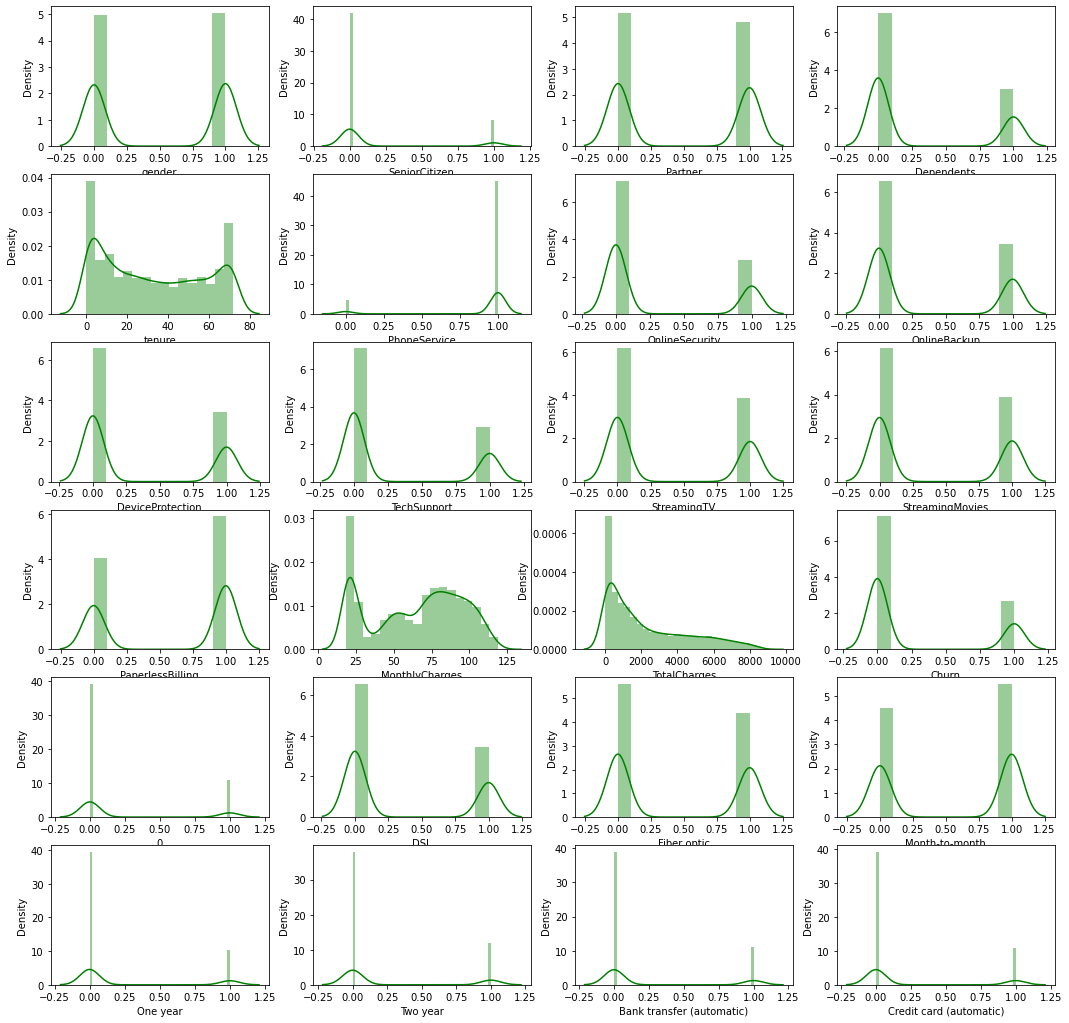

In [51]:
# Checking data distrubution
plt.figure(figsize = (18,18))

plotno = 1

for column in df:
    if plotno<=24:
        ax= plt.subplot(6,4, plotno)
        sns.distplot(df[column],color = "g")
        plt.xlabel(column)
        
    plotno +=1
    
plt.tight_layout

* Since our most of the columns are categorical cant really say they are not normally distributed but we can see monthly charges and total charges has some skewness which needs to be removed.

In [52]:
# splitting data into label and features
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [53]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,0,DSL,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


### Data Scaling:

In [54]:
# Data Scaling Using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

# Modelling:

In [55]:
# Importing necessry liabraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

### Finding best random state:`

In [56]:
# checking for best random state for data split
maxAcc = 0
maxRS=0

for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy=',maxAcc, "Random state=",macRS)    

Best Accuracy= 0.8290743895513912 Random state= 282


* We got an accuracy score of 82% at a random state of 282.

In [57]:
# Spitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= macRS)

<AxesSubplot:xlabel='Churn', ylabel='count'>

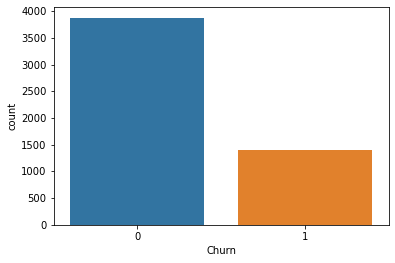

In [58]:
sns.countplot(y_train)

* As we knew, we have imbalnced label column we need to balance it before model fitting

In [60]:
from collections import Counter
Counter(y_train)

Counter({0: 3878, 1: 1404})

In [61]:
# Importing SMOTE for OverSampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()

ove_smp = SMOTE(0.80)

x_train_ns, y_train_ns = ove_smp.fit_resample(x_train,y_train)

print ("number of samples before fit{}".format(Counter(y_train))) 
print ("number of samples after fit{}".format(Counter(y_train_ns)))   

number of samples before fitCounter({0: 3878, 1: 1404})
number of samples after fitCounter({0: 3878, 1: 3102})


<AxesSubplot:xlabel='Churn', ylabel='count'>

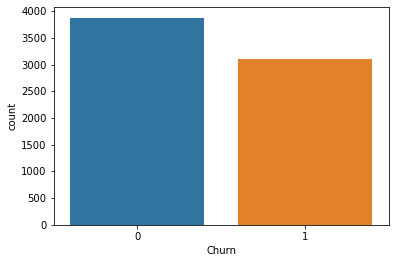

In [62]:
sns.countplot(y_train_ns)

* Now we can see our label column is somehow balanced.

In [63]:
y_train = y_train_ns
x_train = x_train_ns

## 1. Logistic regreession:

In [64]:
# Model fitting with Logistic regreession
LR.fit(x_train,y_train)

predict_=LR.predict(x_test)

print("Accuracy",accuracy_score(y_test,predict_)*100,"%")

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))

Accuracy 76.14991482112437 %
[[979 317]
 [103 362]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1296
           1       0.53      0.78      0.63       465

    accuracy                           0.76      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.76      0.77      1761



## 2. Decision tree Classifier:

In [65]:
# ModeL building with Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,pred)*100,"%")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 74.0488358886996 %
[[1031  265]
 [ 192  273]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1296
           1       0.51      0.59      0.54       465

    accuracy                           0.74      1761
   macro avg       0.68      0.69      0.68      1761
weighted avg       0.75      0.74      0.75      1761



## 3. Random Forest Classifier:

In [66]:
#ModeL building with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print('Accurecy',accuracy_score(y_test,pred)*100,"%")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accurecy 78.87563884156728 %
[[1108  188]
 [ 184  281]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1296
           1       0.60      0.60      0.60       465

    accuracy                           0.79      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.79      0.79      0.79      1761



## 4. Support Vector Classifier (SVC):

In [68]:
# ModeL building with SVC
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
new_pred = svc.predict(x_test)

print('Accurecy',accuracy_score(y_test,new_pred)*100,"%")
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accurecy 78.36456558773425 %
[[1034  262]
 [ 119  346]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1296
           1       0.57      0.74      0.64       465

    accuracy                           0.78      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.81      0.78      0.79      1761



## 5. Gradient Boosting Classifier:

In [72]:
#ModeL building with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train,y_train)

y_pred = gbk.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100,"%")
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))

Accuracy= 81.2038614423623 %
Confusion Matrix [[1098  198]
 [ 133  332]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1296
           1       0.63      0.71      0.67       465

    accuracy                           0.81      1761
   macro avg       0.76      0.78      0.77      1761
weighted avg       0.82      0.81      0.82      1761



# Checking the Cross Validation Score:

In [73]:
# Checking cross validation
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score for Logistic Regression is", scr.mean()*100,"%")

scr = cross_val_score(dt, x,y, cv=8)
print("Cross validation score for Decision tree is", scr.mean()*100,"%")

scr = cross_val_score(rf, x,y, cv=8)
print("Cross validation score for RandomForestClassifier is", scr.mean()*100,"%")

scr = cross_val_score(svc, x,y, cv=8)
print("Cross validation score for SVC is", scr.mean()*100,"%")

scr = cross_val_score(gbk, x,y, cv=8)
print("Cross validation score for GradientBoostingClassifier is", scr.mean()*100,"%")

Cross validation score for Logistic Regression is 80.30674401506552 %
Cross validation score for Decision tree is 72.85238881436385 %
Cross validation score for RandomForestClassifier is 78.70206570529356 %
Cross validation score for SVC is 79.75289572799504 %
Cross validation score for GradientBoostingClassifier is 80.1077191466309 %


Above are the cross validation score for all the models used:

* The difference between accuracy score and cross validation score of Stochastic  Random Forest Classifier is very less compared to other models.
* So, Cross validation shows that our Random Forest Classifier is performing better than others , so tunning hyperparameters for Random Forest Classifier model

## Hyperparameter Tuning:

In [74]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[700,900,1000,1200]
                }

In [76]:
#train the model with given parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'n_estimators': [700, 900, 1000, 1200]})

In [77]:
GCV.best_params_       # printing the best parameters found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 1200}

In [79]:
#lets check the results of final model with best parameters
from sklearn.metrics import roc_curve, roc_auc_score

model = RandomForestClassifier(criterion = 'entropy', max_depth = 20,   n_estimators = 1200)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("------------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 78.87563884156728%
--------------------------------------------------------
roc_auc_score: 73.58248705694942%
--------------------------------------------------------
Confusion Matrix : 
 [[1099  197]
 [ 175  290]]

------------------------------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1296
           1       0.60      0.62      0.61       465

    accuracy                           0.79      1761
   macro avg       0.73      0.74      0.73      1761
weighted avg       0.79      0.79      0.79      1761



# AUC ROC CURVE for final model:

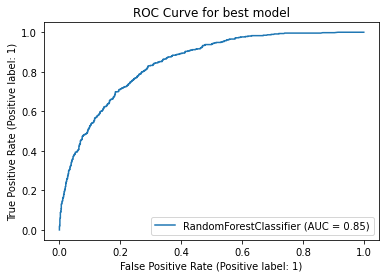

In [81]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for best model')
plt.show()

## Saving The Model:

In [ ]:
import joblib
joblib.dump(model,"Customer_churn.pkl")

# Conclusion :-
* Our target Variable ('Churn') is negatively Correlated with Online security , online backup, Tech support, device protection, tenure, gender, partner & dependents
* 'Mutiple lines' and 'Phones services' are 100 % correlated, so we can consider one of them only.
* Our Gradient Boosting Classifier giving the maximum accuracy results. but,
* The difference between accuracy score and cross validation score of Random Forest Classifier is very less compared to other models.
* So we can conclude that **'Random Forest Classifier' as our best fitting model.**
* The final Accuracy for the prediction of churn prediction model using Classification algorithm is = 78.87 % after tuning.